# EDA - Exploratory Data Analysis

Гибель Титаника является одним из самых печально известных кораблекрушений в истории. 15 апреля 1912 года, во время своего первого рейса, Титаник затонул после столкновения с айсбергом, 1502 из 2224 пассажиров и членов экипажа погибли.

Titianic DataSet - это очень хороший набор данных для изучения pandas и разведочного анализа данных.

Целью этого ноутбука является представление о том, как устроен рабочий процесс построения прогнозирующей модели. Как мы проверяем функции, как мы добавляем новые функции, так же некоторые концепции машинного обучения.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

В пандас принято ипортировать модули как pd. Функция read_csv позволяет читать таблицы из файлов. 

In [4]:
data=pd.read_csv('Titanic.csv')

Для того чтобы увидеть начало таблицы воспользуемся методом head

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для нашего удобства, я вставил ниже изображение с описанием представленных данных. 

<img src="description.png">

In [7]:
data.isnull().sum() #проверка пустых значений в данных

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Возраст, каюта и город отплытия в некоторых случаях не заполнены. Я постараюсь исправить это.

## Сколько выжило?

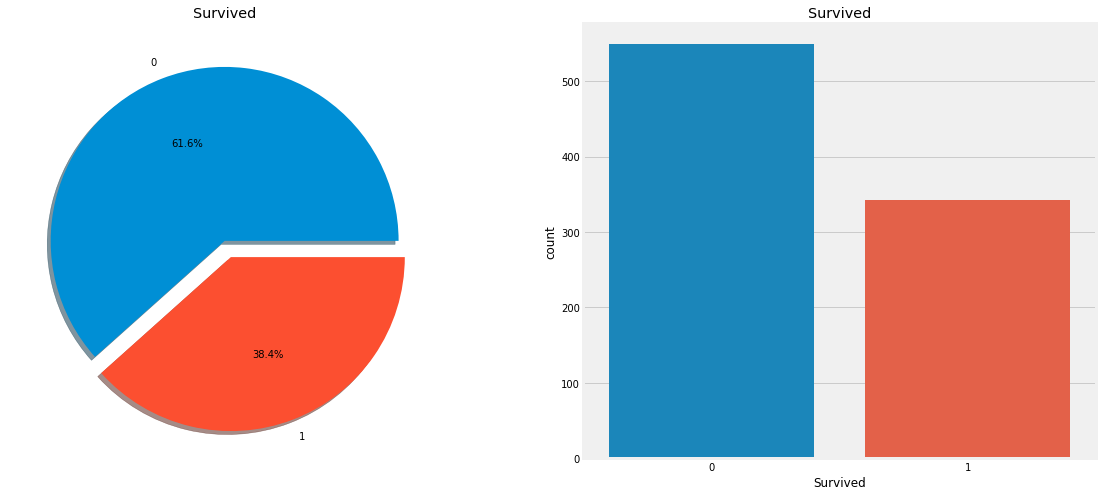

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Очевидно, что не так много пассажиров пережило катастрофу.

Из 891 пассажира в train наборе только около 350  выжило. Всего 38,4% от общего количества пассажиров в наборе. Нам нужно больше копаться, чтобы получить лучшее представление о данных и посмотреть, какие категории пассажиров выжили, и кто этого не сделал.

Мы постараемся понять, какие из сведений в данных оказывали влияние на выживаемость пассажиров. 

## Типы признаков

### Категориальные признаки

Категориальный признак - это признак, значения которого обозначают принадлежность объекта к какой-то категории. 
Примеры таких признаков: пол, страна проживания, номер группы, категория товаров и т.п.

Примеры категориальных признаков в нашем наборе данных: имя, пол, номер каюты и город отплытия. 

In [35]:
data[['Embarked']]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


Очевидно, что компьютер без дополнительного обучения не понимает человечскую речь, что приводит нас к тому, что данные необходимо перекодировать. Для этого мы можем использовать два простых способа. 

#### 1. Label Encoding

Самый простой способ взять готовый из библитеки scikitlearn

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [37]:
le.fit_transform(data['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

#### 2. OneHotEncoding или Dummy

Его так же можно импортировать из sklearn, но мы воспользуемся стандартным пандасовским методом get_dummies

In [42]:
pd.get_dummies(data['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Каждой категории мы создали колонку с ее именем и поставили единицу в тех местах, где значение соответствует строке. 

## Порядковые признаки - ordinal

Аналогичны категориальным признакм, но разница между ними состоит в том, что есть четкое упорядочение категорий. Например, предположим, что у вас есть переменная, экономический статус с тремя категориями (низкий, средний и высокий) или образование (скажем как выпускник начальной школы, выпускник средней школы, какой-либо выпускник колледжа и университета).

Упорядоченные признаки в наборе данных: PClass

## Количественные признаки:

Количественным называется признак, отдельные варианты которого имеют числовое выражение и отражают размеры, масштабы изучаемого объекта или явления.

В наборе данных: возраст

# Анализ признаков

## Пол --> Categorical Feature

In [43]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

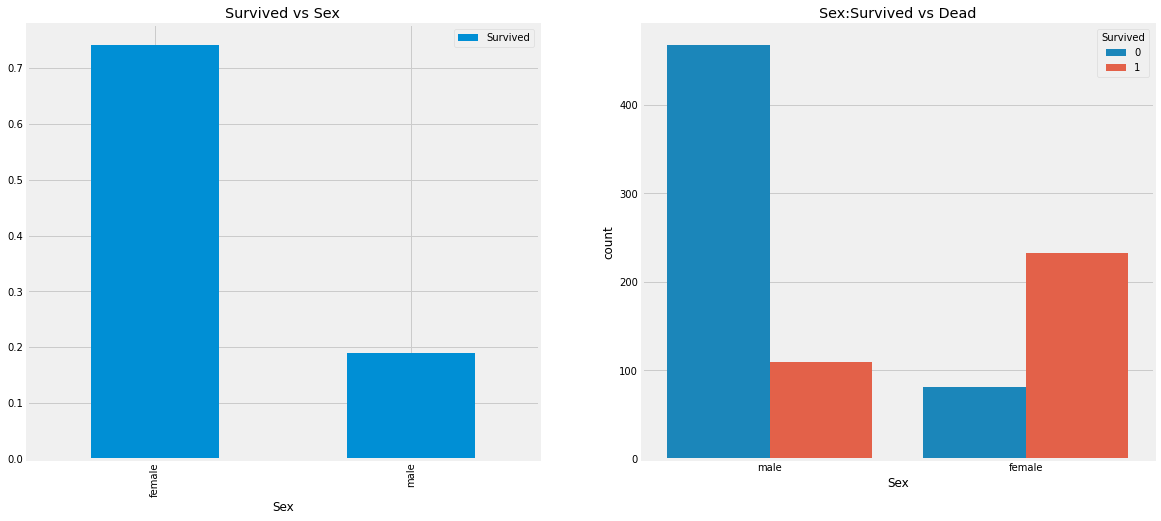

In [52]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Выглядит интересно. Мужчин на корабле намного больше, чем женщин. Тем не менее, количество спасенных женщин почти вдвое превышает количество спасенных мужчин. **Выживаемость женщин на корабле составляет около 75%, а мужчин - около 18-19%.**

Похоже, это очень важный признак для моделирования. Давайте проверим и другие.

## Pclass --> Ordinal Feature

In [51]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


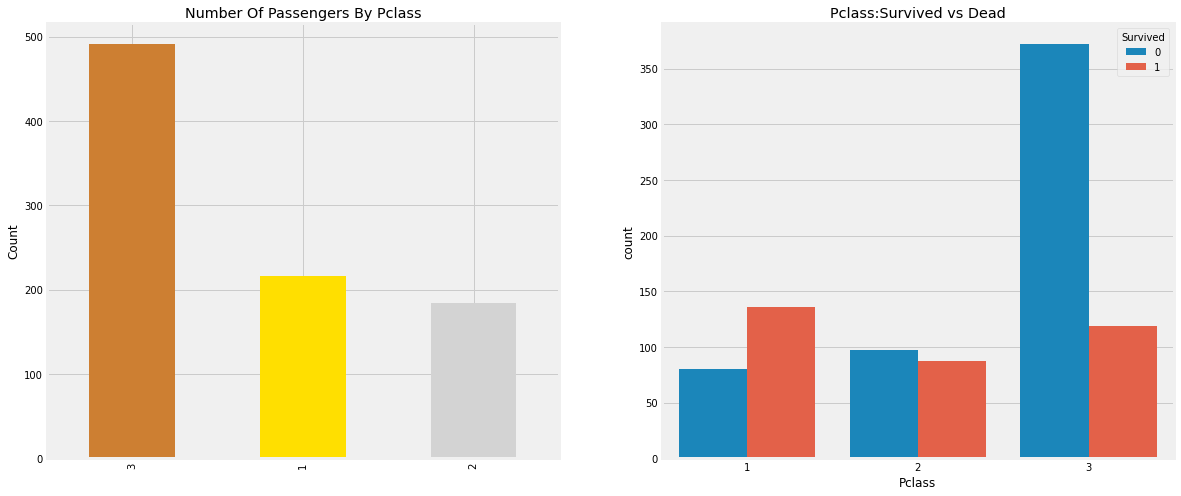

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Люди говорят, что за деньги нельзя купить все. Но мы ясно видим, что пассажиры класса 1 получили очень высокий приоритет при спасении. Несмотря на то, что количество пассажиров в классе 3 было намного выше, количество выживших из них очень низкое, где-то около 25%.

Для Pclass = 1  выживших около 63%, а для Pclass = 2 - около 48%. Так что деньги и статус имеют значение. Такой материалистичный мир.

Давайте углубимся еще немного и проверим другие интересные наблюдения. Проверим выживаемость с помощью Sex and Pclass.

In [54]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

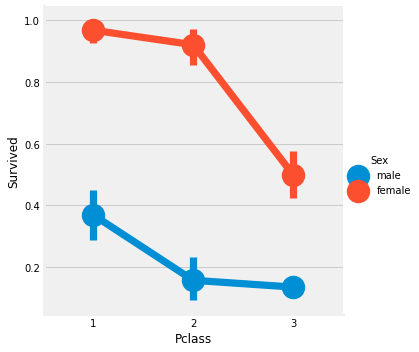

In [55]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

В этом случае мы используем FactorPlot, потому что он упрощает разделение категориальных значений.

Глядя на crosstab и factor plot, мы можем легко сделать вывод, что выживаемость женщин из Pclass1 составляет около 95-96%, так как только 3 из 94 женщин из Pclass1 умерли.

Очевидно, что независимо от Pclass, женщинам уделялось первоочередное внимание при спасении. Даже у мужчин из класса Pclass1 очень низкая выживаемость.

Похоже, Pclass - тоже важная фича. Давайте проанализируем другие особенности.

## Age --> Continous Feature

In [56]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


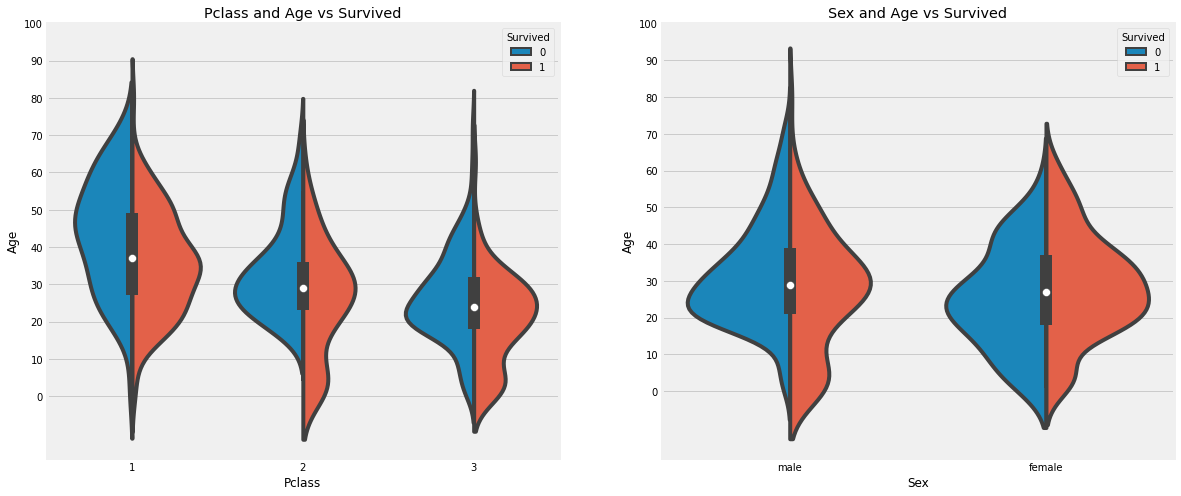

In [57]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**Наблюдения:**

1) Количество детей увеличивается с Pclass, а выживаемость пассажиров младше 10 лет (то есть детей) выглядит хорошей независимо от Pclass.

2) Шансы на выживание для пассажиров в возрасте 20-50 лет из Pclass1 высоки и в особенности для женщин.

3) У мужчин шансы на выживание с возрастом снижаются.

Как мы видели ранее, признак Age имеет 177 нулевых значений. Чтобы заменить эти значения NaN, мы можем присвоить им средний возраст набора данных.

Но проблема в том, что было много людей разного возраста. Мы просто не можем отнести 4-летнего ребенка к среднему возрасту 29 лет. Есть ли способ узнать, в каком возрасте пассажир??

**Да**, мы можем проверить признак имени. Глядя на эту колонку, мы видим, что у имен есть префикс, например, мистер или миссис. Таким образом, мы можем присвоить средние значения мистера и миссис соответствующим группам.

Это самый продвинутый способ что мы можем здесь применить в отличии от заполнения модой или средним. 

In [58]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #извлечем префиксы

Итак, здесь мы используем регулярное выражение: '([A-Za-z]+)\.'. 
Вот что оно делает: оно ищет строки, которые лежат между A-Z или a-z, за которыми следует ".". 
Теперь, мы успешно извлекли инициалы из имени.

In [60]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #сверим инициалы с полом

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Хорошо, есть несколько инициалов с ошибками, например Mlle или Mme, которые обозначают мисс. Я заменю их на Miss и то же самое для других значений.

In [62]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr'],inplace=True)

In [63]:
data.groupby('Initial')['Age'].mean() #посмотрим средний возраст по инициалам

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Заполним пустые значения возрастов

In [64]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [66]:
data.Age.isnull().any() #проверим правильность выполнения

False

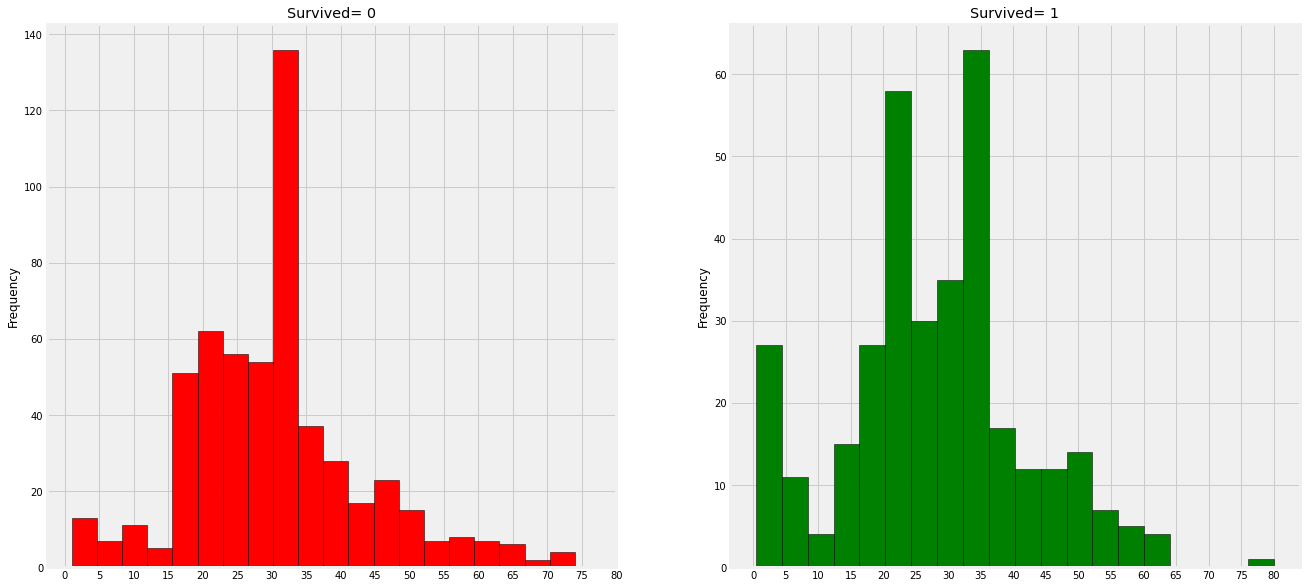

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Наблюдения:

1) Дети младшего возраста (возраст <5) были спасены в большом количестве (Политика «Женщины и дети - прежде всего»).

2) Самый старший Пассажир был спасен (80 лет).

3) Максимальное количество умерших приходилось на возрастную группу 30-40 лет.

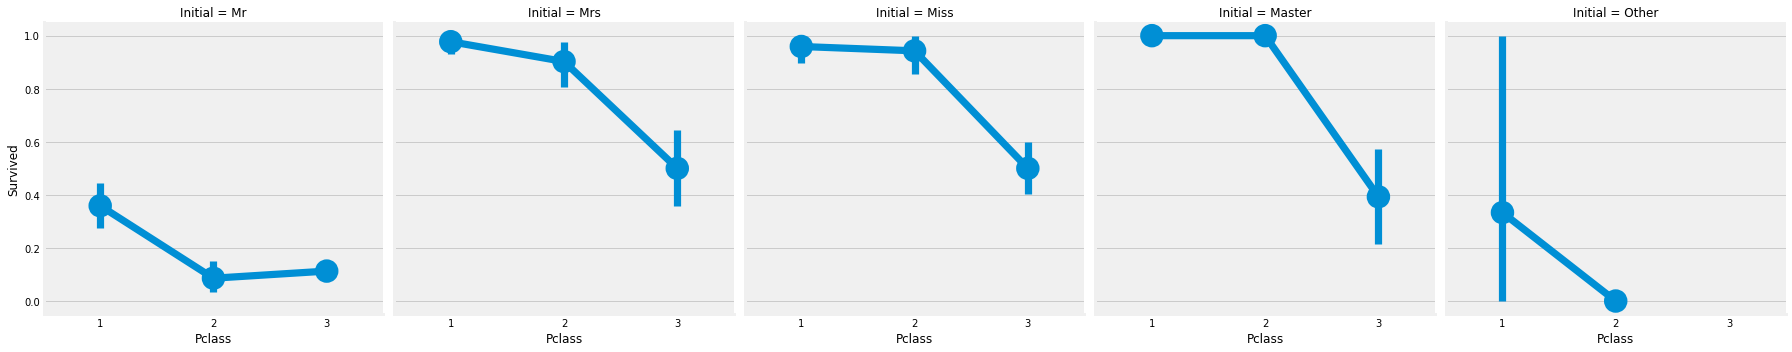

In [68]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

Таким образом, политика «Женщины и дети - прежде всего» действует независимо от класса.

## Embarked --> Categorical Value

In [75]:
pd.crosstab([data.Embarked,data.Pclass],
            [data.Sex,data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

### Шансы на выживание по порту отплытия

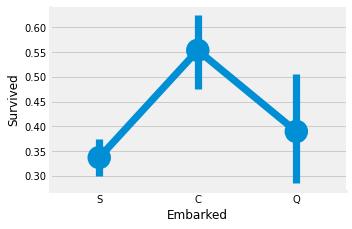

In [76]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Шансы на выживание для порта C самые высокие - около 0,55, а самые низкие для S.

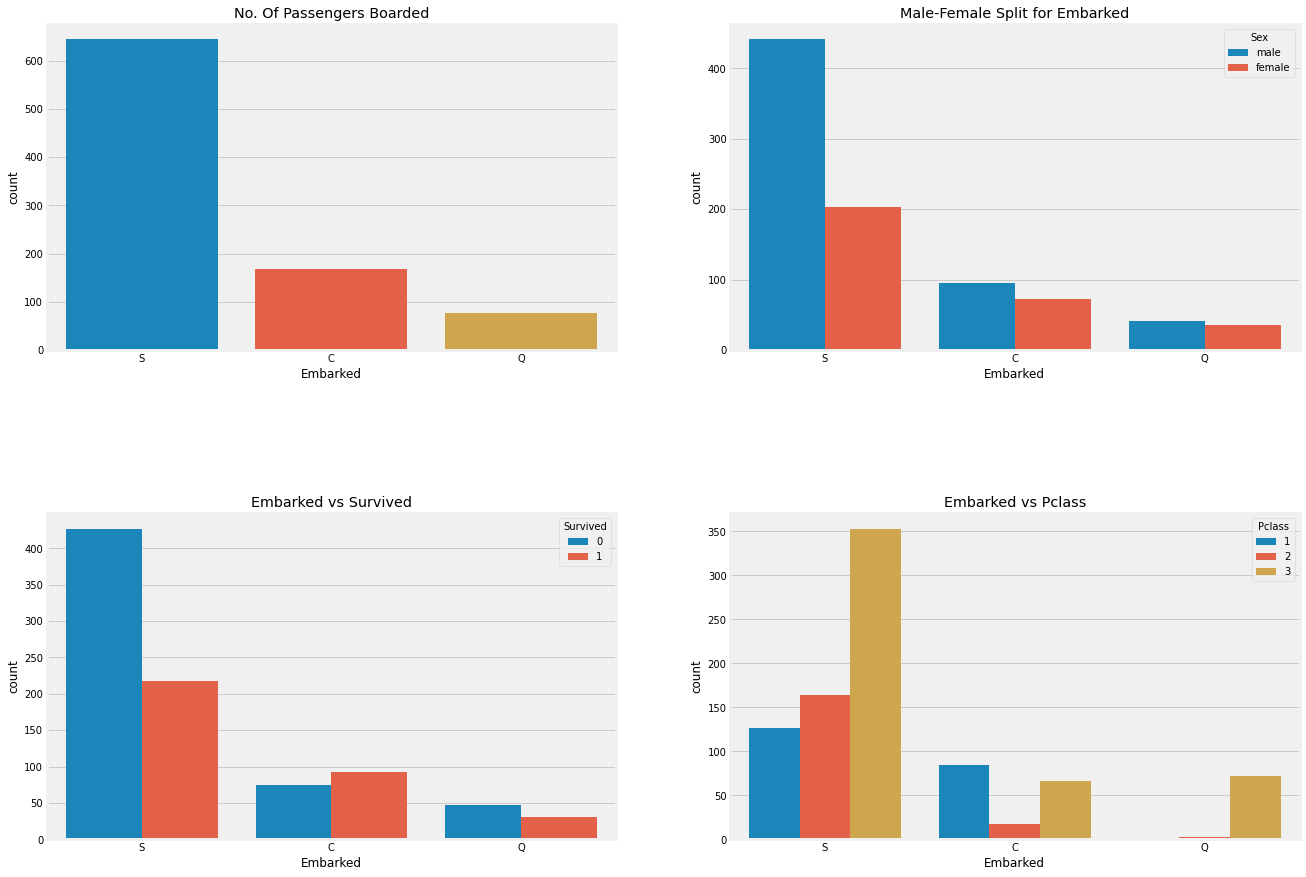

In [77]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Наблюдения:

1) Максимальное количество пассажиров сели на борт в S. Большинство из них из Pclass3.

2) Пассажиры из C выглядят удачливыми, поскольку значительная часть из них выжила. Причиной этого может быть спасение всех пассажиров Pclass1 и Pclass2.

3) Embark S выглядит как порт откуда садилось большинство богатых людей. Тем не менее шансы на выживание здесь низкие, потому что многие пассажиры Pclass3 около 81% не выжили.

4) Порт Q имел почти 95% пассажиров из Pclass3.

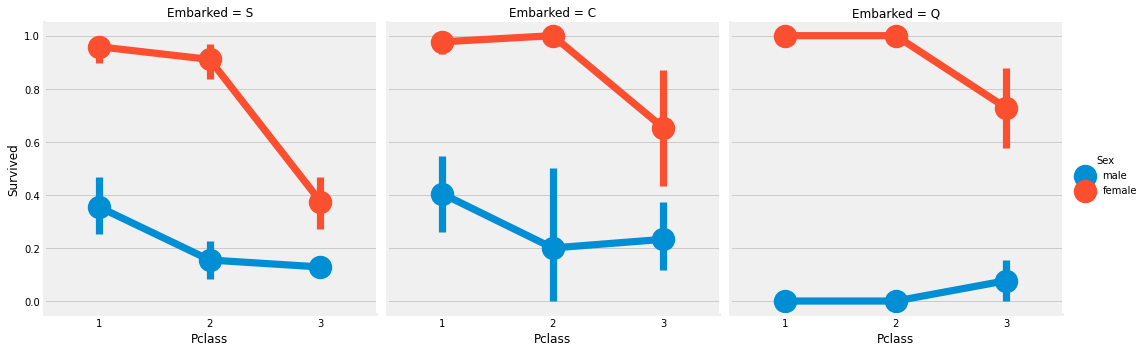

In [78]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

Наблюдения:

1) Шансы на выживание для женщин равны почти 1 для Pclass1 и Pclass2 независимо от порта.

2) Порт S выглядит очень неудачным для пассажиров Pclass3, так как выживаемость как мужчин, так и женщин очень низка (деньги имеют значение).

3) Порт Q выглядит самым неприятным для мужчин, поскольку почти все из них были из Pclass 3.

#### Заполнение NaN в городе отплытия. 

Поскольку мы видели, что большинство пассажиров попавших на борт из порта S, мы заменяем NaN на S.

In [80]:
data['Embarked'].fillna('S',inplace=True)

In [81]:
data.Embarked.isnull().any()# проверка

False

## SibSip --> Discrete Feature

Эта функция показывает, находится ли человек один или с членами своей семьи.

Sibling = брат, сестра, сводный брат, сводная сестра

Spouse = муж, жена.

In [83]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


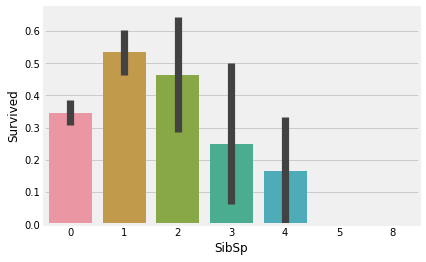

In [100]:
sns.barplot('SibSp','Survived',data=data)
plt.close(2)
plt.show()

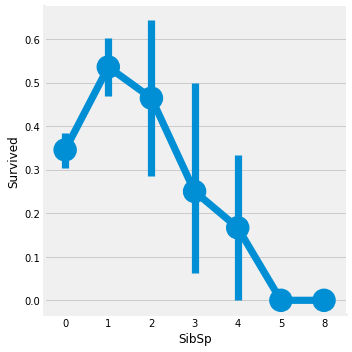

In [91]:
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
plt.close(2)
plt.show()

In [101]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Наблюдения:

Гистограмма и факторная диаграмма показывают, что если пассажир находится на борту один без братьев и сестер, его выживаемость составляет 34,5%. График уменьшается, если количество братьев и сестер увеличивается. Это имеет смысл. То есть, если у меня на борту есть семья, я постараюсь спасти их, а не спасти себя в первую очередь. Удивительно, но выживаемость для семей из 5-8 человек составляет 0%. Причина может быть кроется в Pclass?

**Да.** Причина в Pclass. Перекрестная таблица показывает, что все люди с SibSp > 3 находятся в Pclass3. Неизбежно, что все большие семьи в Pclass3 (> 3) погибли.

## Parch

In [102]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Таблица вновь показывает, что большие семьи находились в 3 классе. 

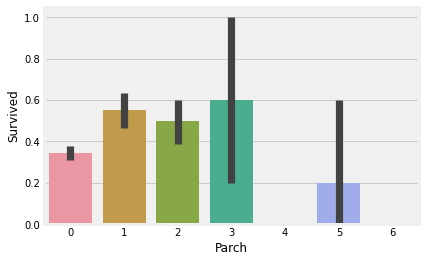

In [105]:
sns.barplot('Parch','Survived',data=data)
plt.close(2)
plt.show()

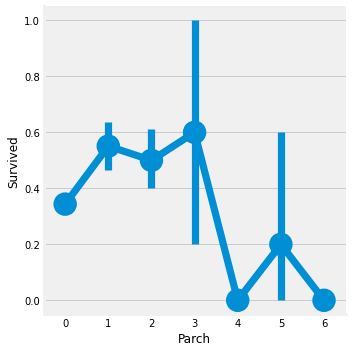

In [106]:
sns.factorplot('Parch','Survived',data=data)
plt.close(2)
plt.show()

Наблюдения:

И здесь результаты очень похожи. У пассажиров с родителями на борту больше шансов на выживание. Однако он уменьшается по мере увеличения числа.

Шансы на выживание хороши для тех, у кого на корабле 1-3 родителя. Одиночество также оказывается фатальным, кроме того шансы на выживание снижаются, если у кого-то на корабле больше 4 родителей.

## Fare --> Continous Feature

In [107]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


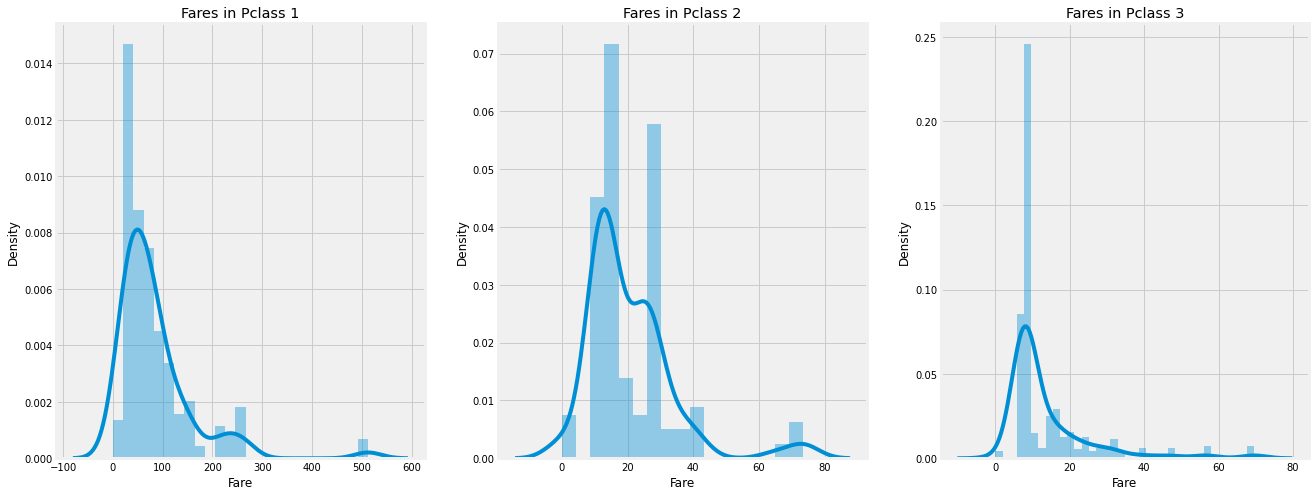

In [108]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Похоже, что тарифы пассажиров класса Pclass1 будут иметь широкое распределение, и это распределение продолжает уменьшаться. Поскольку величина непрерывна, мы можем преобразовать ее в дискретные значения с помощью "корзин".

## Наблюдения в двух словах для всех признаков:

Пол: Шансы на выживание у женщин выше по сравнению с мужчинами.

Pclass: Существует очевидная тенденция к тому, что пассажир 1-го класса имеет больше шансов на выживание. Выживаемость для Pclass3 очень низкая. Для женщин шанс на выживание от Pclass1 составляет почти 1, а также для женщин с Pclass2. Деньги решают!

Возраст: Дети младше 5-10 лет имеют высокие шансы на выживание. Пассажиры в возрасте от 15 до 35 лет в большинстве погибли.

Порт: это очень интересная особенность. Шансы на выживание в C выглядят выше, чем даже если бы большинство пассажиров Pclass1 поднялось на борт в S. Все пассажиры в Q были из Pclass3.

Parch + SibSp: наличие 1-2 братьев и сестер, супруга на борту или 1-3 родителей дают большую вероятность выживания, чем одиночки или большая семья, путешествующая с вами.

## Корреляция признаков

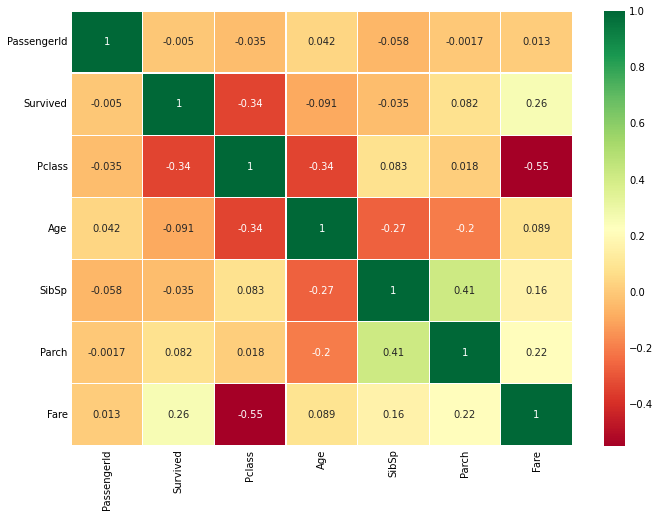

In [109]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


Интерпретация heatmap

Первое, что следует отметить, это то, что сравниваются только числовые характеристики, поскольку очевидно, что мы не можем коррелировать между буквами или строками. Прежде чем разбираться в графике, давайте разберемся, что такое корреляция.

**ПОЛОЖИТЕЛЬНАЯ КОРРЕЛЯЦИЯ: Если увеличение признака A приводит к увеличению признака B, то они положительно коррелированы. Значение 1 означает идеальную положительную корреляцию.**

**ОТРИЦАТЕЛЬНАЯ КОРРЕЛЯЦИЯ: Если увеличение признака А приводит к уменьшению признака В, то они отрицательно коррелированы. Значение -1 означает идеальную отрицательную корреляцию.**

Теперь предположим, что две характеристики сильно или идеально коррелированы, поэтому увеличение одной ведет к увеличению другой. Это означает, что обе функции содержат очень похожую информацию, и разница в информации очень небольшая или отсутствует. Это известно как мультиколинейность, поскольку оба они содержат почти одинаковую информацию.

Как вы думаете, должны ли мы использовать их оба раз уже один из них избыточен?

При создании или обучении моделей мы должны попытаться устранить избыточные признаки, поскольку это сокращает время обучения и приводит к переобучению.

Теперь из приведенной выше тепловой карты мы видим, что между функциями не так много корреляции. Самая высокая корреляция между SibSp и Parch, то есть 0,41. Таким образом, мы можем продолжить работу со всеми признаками.

## Feature Engineering и очистка данных

Что такое feature engineering?

Всякий раз, когда нам дают набор данных с признаками, не обязательно, чтобы все признаки были важны. Вероятно есть признаки которые следует исключить. Кроме того мы можем получать или добавлять новые признаки, наблюдая или извлекая информацию из имеющихся.

Примером может служить получение инициалов с помощью признака имени. Давайте посмотрим, сможем ли мы получить какие-либо новые фичи и удалить некоторые из имеющихся. Также мы преобразуем существующие соответствующие фичи в подходящую форму для прогнозного моделирования.

### Age_band

#### Проблема с возрастнымм признаком:

Как я уже упоминал ранее, возраст - это continious признак, существует проблема с такого рода признаками в моделях машинного обучения.

Например: если я скажу сгруппировать или распределить спортсменов по полу, мы можем легко разделить их по мужчинам и женщинам.

Теперь, если я скажу сгруппировать их по возрасту, как бы вы это сделали? Если имеется 30 человек, может быть 30 значений возраста. Теперь это весьма проблематично.

Нам нужно преобразовать эти непрерывные значения в категориальные значения с помощью "корзин" или нормализации. Я буду использовать корзины, то есть сгруппирую диапазон возрастов в одну корзину или присвою им одно значение.

Итак, максимальный возраст пассажира был 80. Давайте разделим диапазон от 0 до 80 на 5 ячеек. 80/5 = 16, корзины размером 16.

In [111]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [112]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


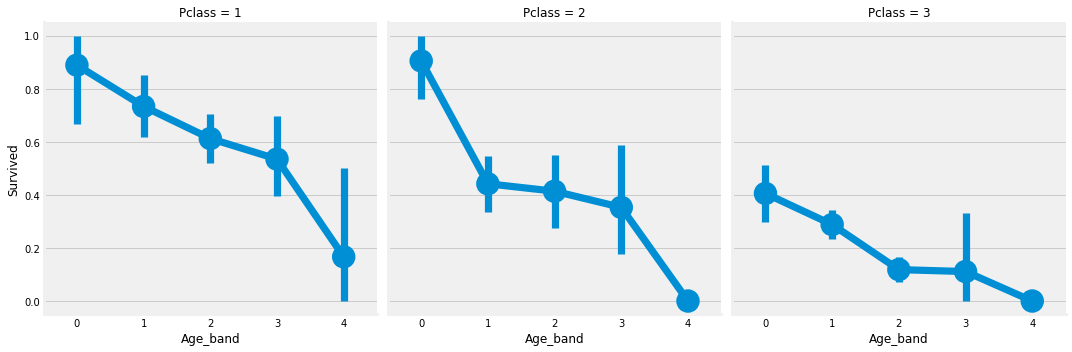

In [113]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

Выживаемость уменьшается с возрастом независимо от класса.

## Family_Size и Alone

На этом этапе мы можем создать новые признаки под названием «Family_size» и «Alone» и проанализировать их. Этот признак является суммированием Parch и SibSp. Это дает нам объединенные данные, чтобы мы могли проверить, имеет ли выживаемость какое-либо отношение к размеру семьи пассажиров. Alone будет обозначать, один пассажир или нет.

In [115]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

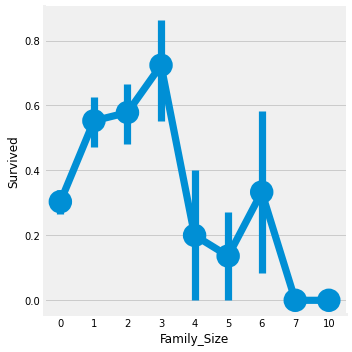

In [123]:
sns.factorplot('Family_Size','Survived',data=data)
plt.close(3)
plt.show()

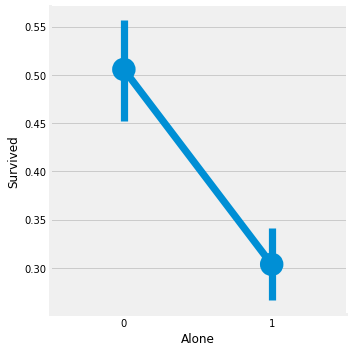

In [124]:
sns.factorplot('Alone','Survived',data=data)
plt.close(2)

Family_Size = 0 означает, что пассажир один. Очевидно, что если вы один или family_size = 0, то шансы на выживание очень низкие. Для семьи размером > 4 шансы тоже снижаются. Выглядит важной особенностью модели.

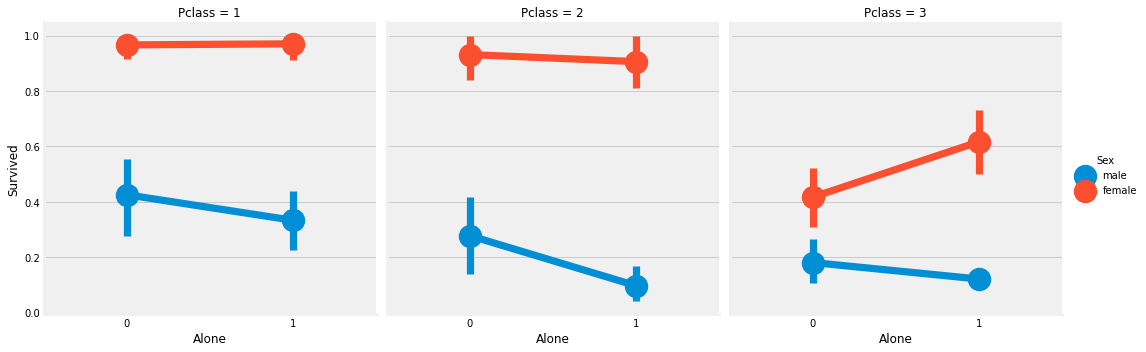

In [125]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

Очевидно, что одиночество вредно независимо от пола или класса, за исключением Pclass3, где шансы одиноких женщин выше, чем у тех, у кого есть семья.

## Fare_Range

Поскольку стоимость проезда также является continious, нам необходимо преобразовать ее. Для этого мы будем использовать pandas.qcut.

Итак, что делает qcut, он разбивает или упорядочивает значения в соответствии с количеством пройденных корзин. Таким образом, если мы перейдем к 5 ячейкам, он упорядочит значения с равным интервалом в 5 отдельных ячеек или диапазонов значений.

In [126]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Как обсуждалось выше, прекрасно видно, что по мере увеличения fare_range шансы на выживание возрастают.

Мы не можем передавать значения Fare_Range как есть. Мы должны преобразовать его в одноэлементные значения так же, как в Age_Band.

In [128]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

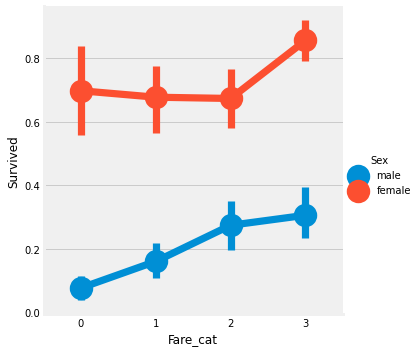

In [129]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Очевидно, что с увеличением Fare_cat шансы на выживание возрастают. Эта особенность может стать важной особенностью во время моделирования наряду с полом.

## Конвертация строковых значений в числовые

Поскольку мы не можем передавать строки в модель машинного обучения, нам необходимо преобразовать признаки, такие как Sex, Embarked и т. д., в числовые значения.

In [130]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Удаление ненужных функций

Name -> Нам не нужен признак имени, так как он не может быть преобразован в какое-либо категориальное значение.

Age -> У нас есть значение Age_band, поэтому в нем нет необходимости.

Ticket -> Это любая случайная строка, которая не может быть отнесена к категории.

Fare -> У нас есть значение Fare_cat, поэтому он не нужен

Cabin -> Многие значения NaN, а также у многих пассажиров есть несколько кают.(есть над чем подумать)

Fare_Range -> У нас есть признак fare_cat.

PassengerId -> Не может быть отнесен к категории.


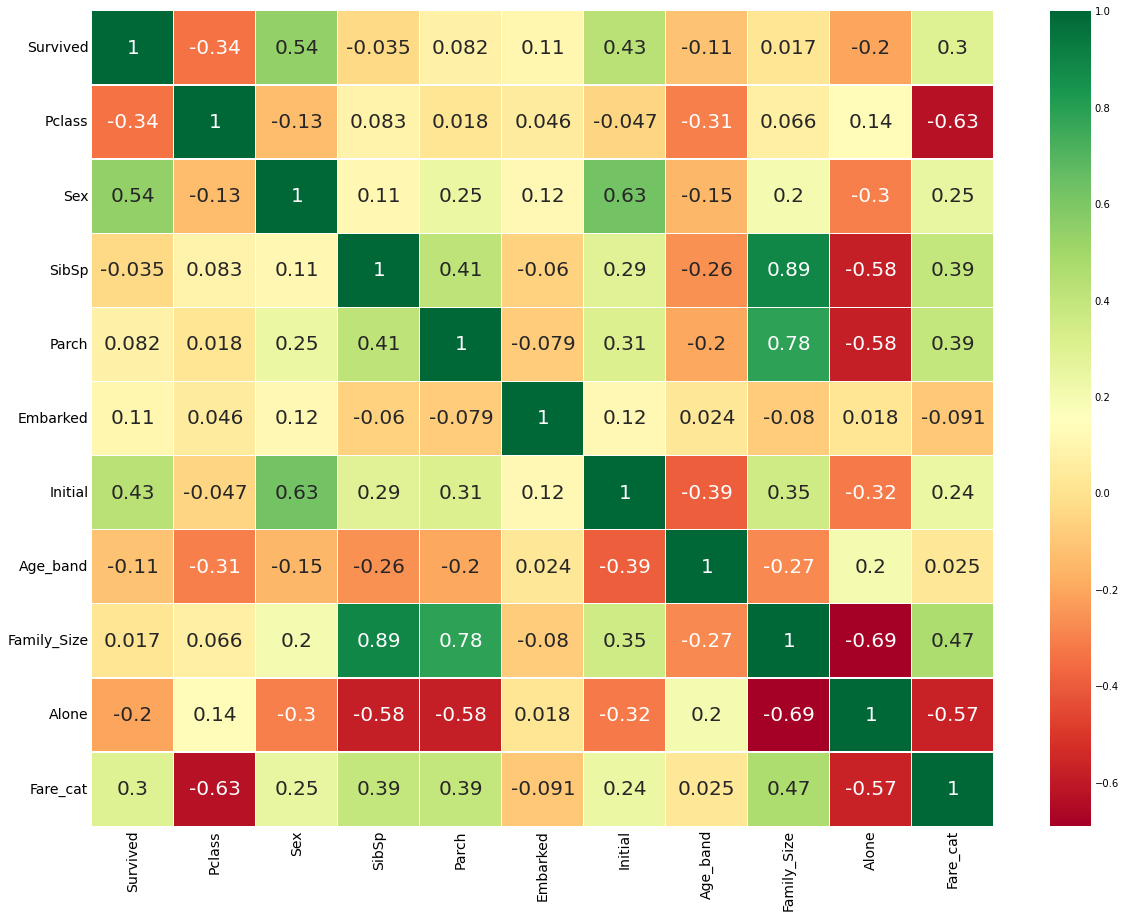

In [132]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Теперь на приведенном выше графике корреляции мы можем увидеть некоторые положительно связанные особенности. Некоторые из них - это SibSp и Family_Size, Parch и Family_Size, а некоторые отрицательные, такие как Alone и Family_Size.

На этом все, можно спокойно приступать к обучению модели. 